In [1]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt  # Importing Matplotlib for visualizations
import seaborn as sns  # For advanced visualizations like heatmaps and pair plots

# File paths
file_synthetic_data_generation_llm = "../data/synthetic_data/synthetic_data_generation_llm.csv"  # Check if this file exists 

# Check if the file exists in the first folder
if os.path.exists(file_synthetic_data_generation_llm):
    # If it exists, delete the file from the other folder
    if os.path.exists(file_synthetic_data_generation_llm):
        os.remove(file_synthetic_data_generation_llm)
        print(f"{file_synthetic_data_generation_llm} has been deleted.")
    else:
        print(f"{file_synthetic_data_generation_llm} does not exist.")
else:
    print(f"{file_synthetic_data_generation_llm} does not exist.")


../data/synthetic_data/synthetic_data_generation_llm.csv has been deleted.


In [2]:
import pandas as pd
import numpy as np
import random
 

# Function to simulate structured data generation using LLM-like behavior
def llm_generate_synthetic_row():
    # Simulating relationships between features
    duration = np.random.choice([0, 1, 2, 5, 10, 15, 20, 30, 60, 120], p=[0.15, 0.1, 0.05, 0.1, 0.1, 0.15, 0.1, 0.05, 0.1, 0.1])
    protocol = np.random.choice(['TCP', 'UDP', 'ICMP'], p=[0.6, 0.25, 0.15])
    
    if protocol == 'TCP':
        service = np.random.choice(['http', 'ftp', 'smtp', 'telnet'], p=[0.5, 0.2, 0.2, 0.1])
        flag = np.random.choice(['SF', 'REJ', 'S1'], p=[0.7, 0.2, 0.1])
        src_bytes = int(np.random.normal(1000, 500))
        dst_bytes = int(np.random.normal(1500, 500))
    elif protocol == 'UDP':
        service = np.random.choice(['dns', 'eco_i', 'ntp_u'], p=[0.4, 0.3, 0.3])
        flag = 'SF'
        src_bytes = int(np.random.normal(800, 400))
        dst_bytes = int(np.random.normal(900, 400))
    else:
        service = 'echo'
        flag = 'SF'
        src_bytes = 0
        dst_bytes = 0

    land = 0
    wrong_frag = random.randint(0, 3)
    urgent = random.randint(0, 3)

    # Generating counts based on reasonable correlations
    count = int(np.random.exponential(20))
    serror_rate = round(np.random.beta(2, 5), 2)  # Beta distribution to simulate probability
    dst_host_same_srv_rate = round(np.random.beta(5, 2), 2)

    # Generate attack label based on the characteristics of the row
    if flag == 'REJ' and protocol == 'TCP':
        label = 'dos'
    elif service in ['ftp', 'telnet']:
        label = 'r2l'
    elif protocol == 'ICMP' and service == 'echo':
        label = 'probe'
    else:
        label = 'normal'

    return {
        'duration': duration,
        'protocol': protocol,
        'service': service,
        'flag': flag,
        'src_bytes': max(0, src_bytes),
        'dst_bytes': max(0, dst_bytes),
        'land': land,
        'wrong_frag': wrong_frag,
        'urgent': urgent,
        'count': count,
        'serror_rate': serror_rate,
        'dst_host_same_srv_rate': dst_host_same_srv_rate,
        'label': label
    }

# Number of synthetic rows you want to generate
num_rows = 1000

# Generate the synthetic dataset using the LLM-like method
synthetic_data_llm = [llm_generate_synthetic_row() for _ in range(num_rows)]

# Convert the synthetic data into a DataFrame
df_llm = pd.DataFrame(synthetic_data_llm)

# Display the first few rows of the dataset
print(df_llm.head())

# Save the dataset as a CSV file if needed
df_llm.to_csv(file_synthetic_data_generation_llm, index=False)


   duration protocol service flag  src_bytes  dst_bytes  land  wrong_frag  \
0         5      TCP  telnet   SF        327       1232     0           3   
1         1      TCP    smtp   SF        650       1686     0           0   
2        20     ICMP    echo   SF          0          0     0           3   
3       120      UDP     dns   SF        668        839     0           0   
4         1      TCP    http   SF        215       1883     0           3   

   urgent  count  serror_rate  dst_host_same_srv_rate   label  
0       3    102         0.57                    0.77     r2l  
1       3     11         0.10                    0.86  normal  
2       0      9         0.16                    0.68   probe  
3       3      4         0.27                    0.80  normal  
4       2     39         0.48                    0.89  normal  


In [3]:
def generate_descriptive_stats_report(df):
    # Generate descriptive statistics for numerical columns
    report = df.describe()
    print("Descriptive Statistics Report:")
    print(report)
    return report

# Generate descriptive statistics report
descriptive_stats = generate_descriptive_stats_report(df_llm)


Descriptive Statistics Report:
         duration    src_bytes    dst_bytes    land   wrong_frag       urgent  \
count  1000.00000  1000.000000  1000.000000  1000.0  1000.000000  1000.000000   
mean     25.82100   808.856000  1093.202000     0.0     1.493000     1.476000   
std      36.08669   557.833022   699.882747     0.0     1.118572     1.088397   
min       0.00000     0.000000     0.000000     0.0     0.000000     0.000000   
25%       2.00000   391.000000   581.750000     0.0     0.000000     1.000000   
50%      15.00000   822.000000  1147.000000     0.0     2.000000     1.000000   
75%      30.00000  1197.250000  1596.750000     0.0     2.000000     2.000000   
max     120.00000  2690.000000  3042.000000     0.0     3.000000     3.000000   

            count  serror_rate  dst_host_same_srv_rate  
count  1000.00000  1000.000000              1000.00000  
mean     19.82400     0.286760                 0.71041  
std      19.99512     0.160867                 0.16251  
min       0

In [4]:
def generate_frequency_distribution_report(df, categorical_columns):
    print("\nFrequency Distribution Report:")
    for col in categorical_columns:
        print(f"\nFrequency distribution for {col}:")
        print(df[col].value_counts())
        print("\n")

# Generate frequency distribution report for categorical columns
categorical_columns = ['protocol', 'service', 'flag', 'label']
generate_frequency_distribution_report(df_llm, categorical_columns)



Frequency Distribution Report:

Frequency distribution for protocol:
protocol
TCP     583
UDP     251
ICMP    166
Name: count, dtype: int64



Frequency distribution for service:
service
http      300
echo      166
smtp      113
ftp       111
dns        95
ntp_u      79
eco_i      77
telnet     59
Name: count, dtype: int64



Frequency distribution for flag:
flag
SF     854
REJ    103
S1      43
Name: count, dtype: int64



Frequency distribution for label:
label
normal    587
probe     166
r2l       144
dos       103
Name: count, dtype: int64





Correlation Report:
                        duration  src_bytes  dst_bytes  land  wrong_frag  \
duration                1.000000  -0.010034  -0.023604   NaN   -0.049814   
src_bytes              -0.010034   1.000000   0.503132   NaN   -0.028275   
dst_bytes              -0.023604   0.503132   1.000000   NaN   -0.010575   
land                         NaN        NaN        NaN   NaN         NaN   
wrong_frag             -0.049814  -0.028275  -0.010575   NaN    1.000000   
urgent                 -0.020154   0.021192  -0.016995   NaN    0.023295   
count                   0.012450  -0.055625   0.007885   NaN   -0.014735   
serror_rate             0.012120  -0.005933   0.077966   NaN   -0.008860   
dst_host_same_srv_rate -0.066910   0.028837   0.023638   NaN    0.024163   

                          urgent     count  serror_rate  \
duration               -0.020154  0.012450     0.012120   
src_bytes               0.021192 -0.055625    -0.005933   
dst_bytes              -0.016995  0.00788

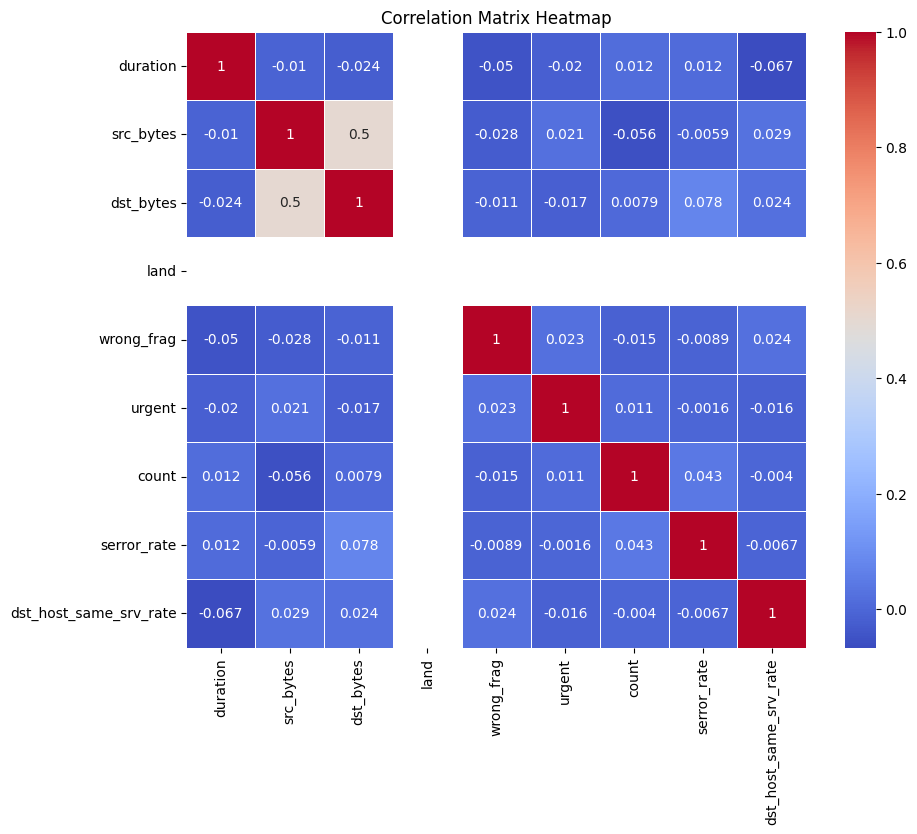

In [5]:
def generate_correlation_report(df):
    # Select only the numerical columns for correlation
    numerical_df = df.select_dtypes(include=[np.number])

    if numerical_df.empty:
        print("No numerical columns available for correlation.")
        return None

    correlation_matrix = numerical_df.corr()
    print("\nCorrelation Report:")
    print(correlation_matrix)

    # Plot heatmap of the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

# Generate correlation report
generate_correlation_report(df_llm)


In [6]:
def generate_label_based_report(df, label_column):
    print("\nLabel-Based Report:")
    # Select only the numerical columns for aggregation
    numerical_columns = df.select_dtypes(include=[np.number])
    
    # Group by the label column and calculate statistics for each group
    if numerical_columns.empty:
        print(f"No numerical columns available for label-based report.")
        return None
    
    label_report = numerical_columns.groupby(df[label_column]).agg(['mean', 'std', 'min', 'max'])
    print(label_report)
    return label_report

# Generate label-based report for the 'label' column
label_based_report = generate_label_based_report(df_llm, 'label')



Label-Based Report:
         duration                        src_bytes                        \
             mean        std min  max         mean         std min   max   
label                                                                      
dos     24.233010  36.176095   0  120  1015.669903  482.173518   0  1922   
normal  26.262351  36.891400   0  120   932.945486  454.059509   0  2690   
probe   27.114458  37.366719   0  120     0.000000    0.000000   0     0   
r2l     23.666667  31.089989   0  120  1087.520833  481.149032   0  2395   

          dst_bytes              ... count      serror_rate                  \
               mean         std  ...   min  max        mean       std   min   
label                            ...                                          
dos     1477.077670  503.259429  ...     0   85    0.287573  0.160724  0.03   
normal  1235.967632  550.254738  ...     0  118    0.288348  0.165009  0.01   
probe      0.000000    0.000000  ...     0  104    

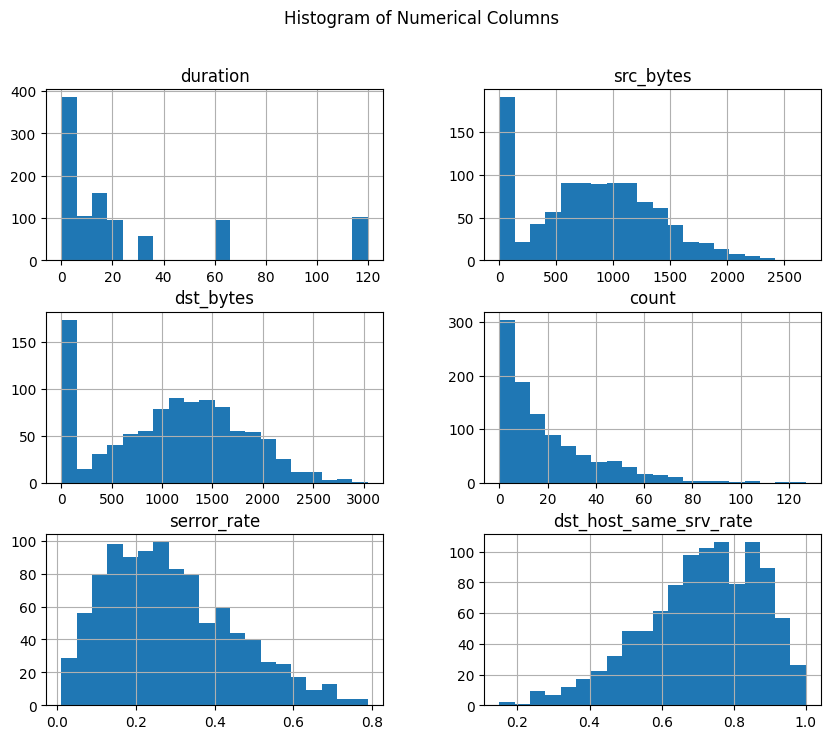

In [7]:

def plot_histograms(df, numerical_columns):
    df[numerical_columns].hist(bins=20, figsize=(10, 8))
    plt.suptitle("Histogram of Numerical Columns")  # Adding title using Matplotlib's plt
    plt.show()

# Example usage: Plot histograms for numerical columns
numerical_columns = ['duration', 'src_bytes', 'dst_bytes', 'count', 'serror_rate', 'dst_host_same_srv_rate']
plot_histograms(df_llm, numerical_columns)


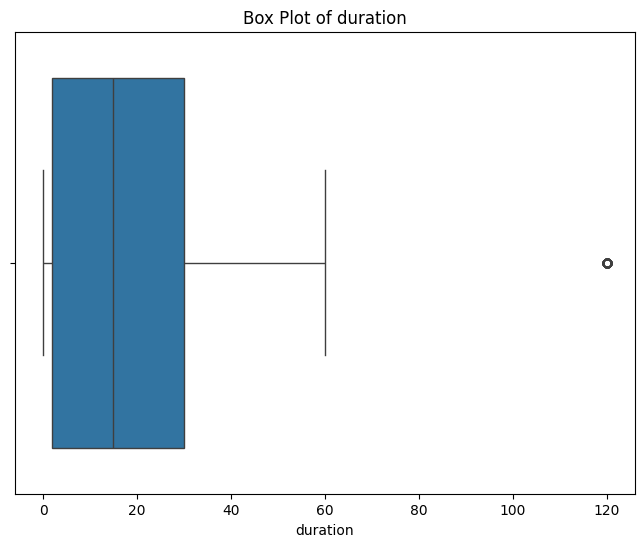

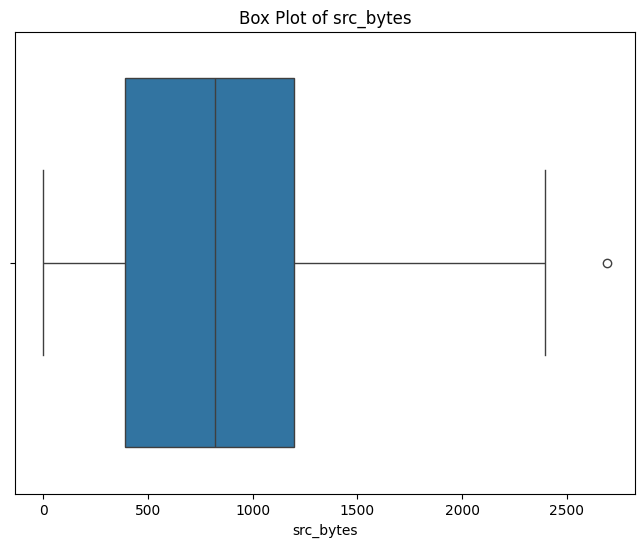

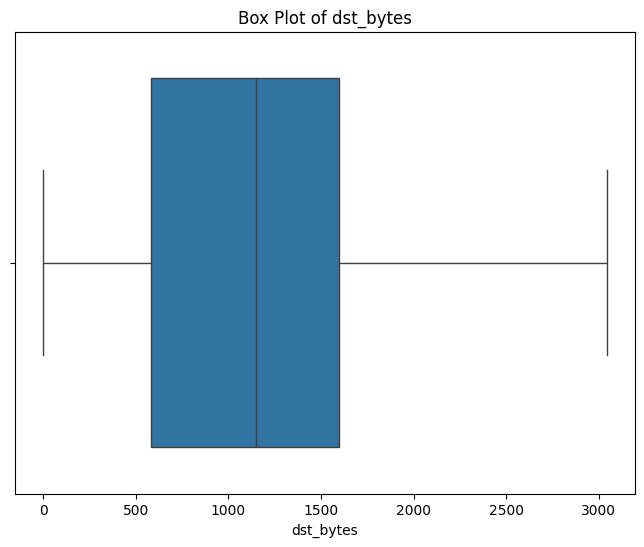

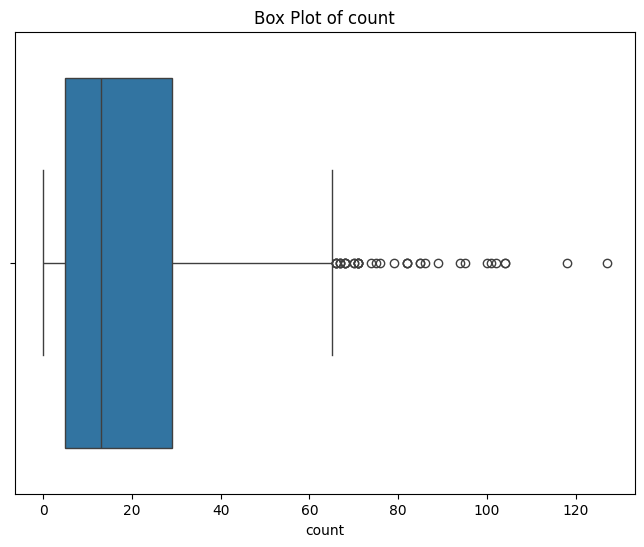

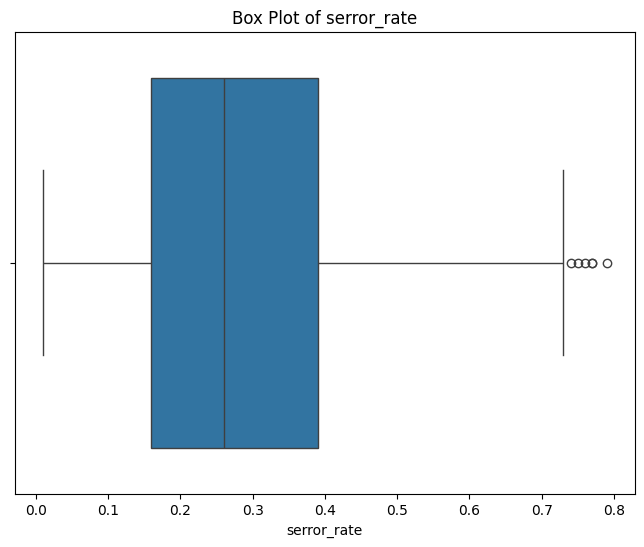

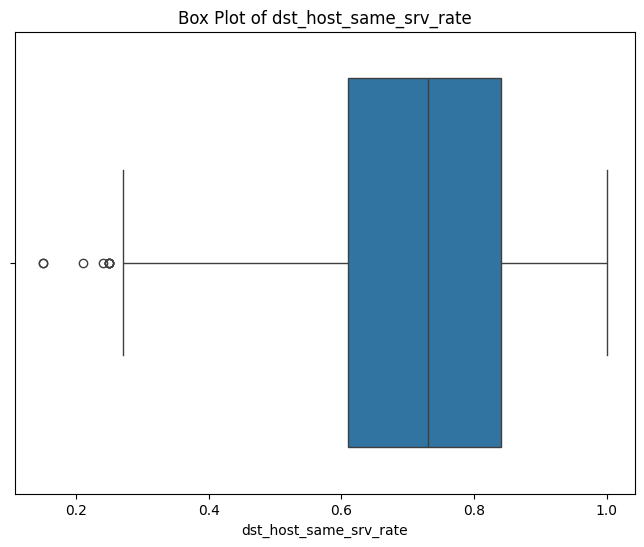

In [8]:
def plot_box_plots(df, numerical_columns):
    for col in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=col)
        plt.title(f"Box Plot of {col}")
        plt.show()

# Plot box plots for numerical columns
plot_box_plots(df_llm, numerical_columns)


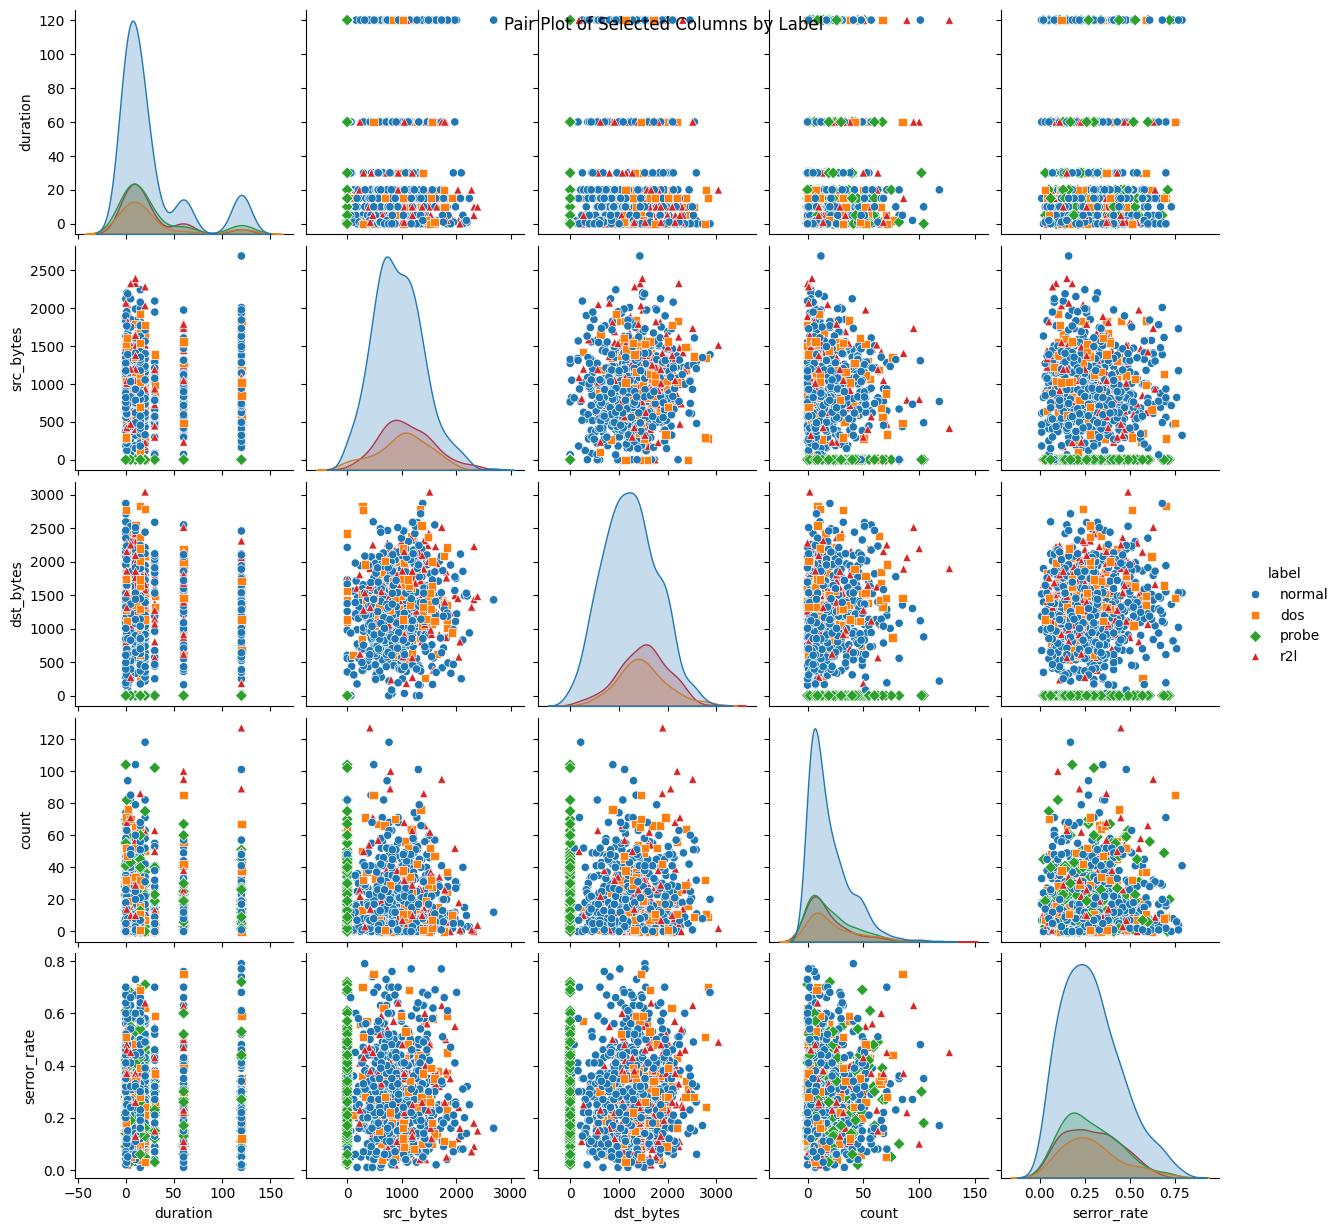

In [9]:
def plot_pair_plot(df, columns):
    sns.pairplot(df[columns], hue='label', diag_kind='kde', markers=["o", "s", "D", "^"])
    plt.suptitle("Pair Plot of Selected Columns by Label")
    plt.show()

# Plot pair plots for selected numerical columns
selected_columns = ['duration', 'src_bytes', 'dst_bytes', 'count', 'serror_rate', 'label']
plot_pair_plot(df_llm, selected_columns)


In [10]:
def generate_descriptive_stats_report(df):
    # Generate descriptive statistics for numerical columns
    report = df.describe()
    print("Descriptive Statistics Report:")
    print(report)
    return report

# Generate descriptive statistics report
descriptive_stats = generate_descriptive_stats_report(df_llm)


Descriptive Statistics Report:
         duration    src_bytes    dst_bytes    land   wrong_frag       urgent  \
count  1000.00000  1000.000000  1000.000000  1000.0  1000.000000  1000.000000   
mean     25.82100   808.856000  1093.202000     0.0     1.493000     1.476000   
std      36.08669   557.833022   699.882747     0.0     1.118572     1.088397   
min       0.00000     0.000000     0.000000     0.0     0.000000     0.000000   
25%       2.00000   391.000000   581.750000     0.0     0.000000     1.000000   
50%      15.00000   822.000000  1147.000000     0.0     2.000000     1.000000   
75%      30.00000  1197.250000  1596.750000     0.0     2.000000     2.000000   
max     120.00000  2690.000000  3042.000000     0.0     3.000000     3.000000   

            count  serror_rate  dst_host_same_srv_rate  
count  1000.00000  1000.000000              1000.00000  
mean     19.82400     0.286760                 0.71041  
std      19.99512     0.160867                 0.16251  
min       0